# 当日各项指标的同/环比情况

In [111]:
import pandas as pd
df = pd.read_excel(r'D:\Data-Science\share\excel-python报表自动化\sale_data.xlsx')
df

order_id   城市       省份       创建日期       付款日期       收货日期       退款日期
0           1  北京市       北京 2021-04-04 2021-04-07 2021-04-13 1970-01-01
1           2  福州市      福建省 2021-04-02 2021-04-10 1970-01-01 1970-01-01
2           3  广州市      广东省 2021-04-05 1970-01-01 1970-01-01 1970-01-01
3           4  桂林市  广西壮族自治区 2021-04-11 2021-04-02 2021-04-09 1970-01-01
4           5  郑州市      河南省 2021-04-09 1970-01-01 1970-01-01 1970-01-01
..        ...  ...      ...        ...        ...        ...        ...
495       496  贵阳市      贵州省 2021-04-11 2021-04-11 2021-04-21 1970-01-01
496       497  北京市       北京 2021-04-11 2021-04-03 2021-04-06 2021-04-10
497       498  贵阳市      贵州省 2021-04-11 2021-04-07 2021-04-15 1970-01-01
498       499  广州市      广东省 2021-04-11 2021-04-09 2021-04-12 2021-04-21
499       500  北京市       北京 2021-04-11 2021-04-06 1970-01-01 1970-01-01

[500 rows x 7 columns]

In [112]:
def get_data(date):   
    create_cnt = df[df['创建日期'] == date]['order_id'].count()
    pay_cnt = df[df['付款日期'] == date]['order_id'].count()
    receive_cnt = df[df['收货日期'] == date]['order_id'].count()
    return_cnt = df[df['退款日期'] == date]['order_id'].count()
    return create_cnt,pay_cnt,receive_cnt,return_cnt

In [113]:
df_view = pd.DataFrame([get_data('2021-04-11')
                     ,get_data('2021-04-10')
                     ,get_data('2021-04-04')]
                     ,columns = ['创建订单量','付款订单量','收货订单量','退款订单量']
                     ,index = ['当日','昨日','上周同期']).T
df_view

当日  昨日  上周同期
创建订单量  50  80    40
付款订单量  30  55    25
收货订单量  27  28    15
退款订单量   4   5     3

In [165]:
df_view['环比'] = df_view['当日'] / df_view['昨日'] - 1
df_view['同比'] = df_view['当日'] / df_view['上周同期'] - 1
df_view

当日  昨日  上周同期        环比        同比
创建订单量  50  80    40 -0.375000  0.250000
付款订单量  30  55    25 -0.454545  0.200000
收货订单量  27  28    15 -0.035714  0.800000
退款订单量   4   5     3 -0.200000  0.333333

In [106]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

wb = Workbook()
ws = wb.active

for r in dataframe_to_rows(df_view,index = True,header = True):
    ws.append(r)

wb.save(r'D:\Data-Science\share\excel-python报表自动化\核心指标_原始.xlsx')

In [107]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import colors
from openpyxl.styles import Font
from openpyxl.styles import PatternFill
from openpyxl.styles import Border, Side
from openpyxl.styles import Alignment

wb = Workbook()
ws = wb.active

for r in dataframe_to_rows(df_view,index = True,header = True):
    ws.append(r)

ws.delete_rows(2)
ws['A1'] = '指标'

ws.insert_rows(1)
ws['A1'] = '电商业务方向 2021/4/11 日报'

ws.merge_cells('A1:F1') #合并单元格

for row in ws[1:6]:
    for r in row:
        r.font = Font(name = '微软雅黑',size = 12)
        r.alignment = Alignment(horizontal = "center")
        r.border = Border(left = Side(border_style = "thin",color = "FF000000"),
                   right = Side(border_style = "thin",color = "FF000000"),
                   top = Side(border_style = "thin",color = "FF000000"),
                   bottom = Side(border_style = "thin",color = "FF000000"))

for row in ws[1:2]:
    for r in row:
        r.font = Font(name = '微软雅黑',size = 12,bold = True,color = "FFFFFFFF")
        r.fill = PatternFill(fill_type = 'solid',start_color='FFFF6100')
        
for col in ws["E":"F"]:
    for c in col:
        c.number_format = '0.00%'

#调整列宽
ws.column_dimensions['A'].width = 13
ws.column_dimensions['E'].width = 10
        
wb.save(r'D:\Data-Science\share\excel-python报表自动化\核心指标.xlsx')

# 当日各省份创建订单量情况

In [108]:
df_province = pd.DataFrame(df[df['创建日期'] == '2021-04-11']
                           .groupby('省份')['order_id'].count())
df_province = df_province.reset_index()
df_province = df_province.sort_values(by = 'order_id',ascending = False)
df_province = df_province.rename(columns = {'order_id':'创建订单量'})
df_province

省份  创建订单量
0       北京      7
3  广西壮族自治区      7
7      甘肃省      6
8      福建省      6
9      贵州省      6
5      河南省      5
6      海南省      5
1      安徽省      3
4      河北省      3
2      广东省      2

In [157]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import colors
from openpyxl.styles import Font
from openpyxl.styles import PatternFill
from openpyxl.styles import Border, Side
from openpyxl.styles import Alignment
from openpyxl.formatting.rule import DataBarRule

wb = Workbook()
ws = wb.active

for r in dataframe_to_rows(df_province,index = False,header = True):
    ws.append(r)

for row in ws[1:11]:
    for r in row:
        r.font = Font(name = '微软雅黑',size = 12)
        r.alignment = Alignment(horizontal = "center")
        r.border = Border(left = Side(border_style = "thin",color = "FF000000"),
                   right = Side(border_style = "thin",color = "FF000000"),
                   top = Side(border_style = "thin",color = "FF000000"),
                   bottom = Side(border_style = "thin",color = "FF000000"))

rule = DataBarRule(start_type = 'min',end_type = 'max',
                    color="FF638EC6", showValue=True, minLength=None, maxLength=None)
    
ws.conditional_formatting.add('B1:B11',rule)

for r in ws[1]:
    r.font = Font(name = '微软雅黑',size = 12,bold = True,color = "FFFFFFFF")
    r.fill = PatternFill(fill_type = 'solid',start_color='FFFF6100')
        

#调整列宽
ws.column_dimensions['A'].width = 17
ws.column_dimensions['B'].width = 13
        
wb.save(r'D:\Data-Science\share\excel-python报表自动化\各省份销量情况.xlsx')

# 最近一段时间创建订单量趋势

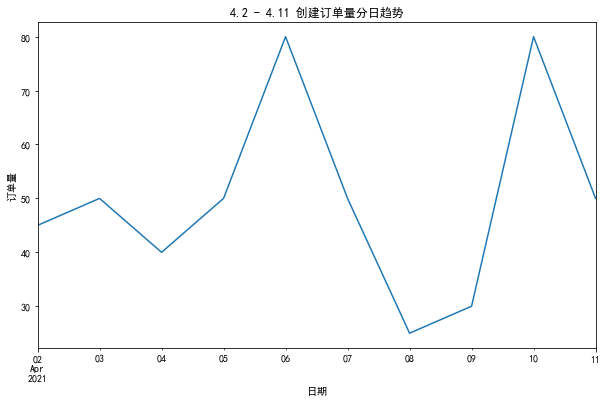

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.figure(figsize = (10,6))
df.groupby('创建日期')['order_id'].count().plot()
plt.title('4.2 - 4.11 创建订单量分日趋势')
plt.xlabel('日期')
plt.ylabel('订单量')
plt.savefig(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.png')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.figure(figsize = (10,6))
df.groupby('创建日期')['order_id'].count().plot()
plt.title('4.2 - 4.11 创建订单量分日趋势')
plt.xlabel('日期')
plt.ylabel('订单量')
plt.savefig(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.png')

In [100]:
from openpyxl import Workbook
from openpyxl.drawing.image import Image

wb = Workbook()
ws = wb.active

img = Image(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.png')

ws.add_image(img, 'A1')

wb.save(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.xlsx')

# 将不同的结果进行合并

## 将不同的结果合并到同一个 Sheet 中

In [164]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

wb = Workbook()
ws = wb.active

#先将核心指标df_view表插入进去
for r in dataframe_to_rows(df_view,index = True,header = True):
    ws.append(r)

#再将各省份情况df_province表插入进去
#先将表头插入
for j in range(df_province.shape[1]):
    ws.cell(row = df_view.shape[0] + 5,column = 1 + j).value = df_province.columns[j]

#再把具体的值插入
for i in range(df_province.shape[0]):
    for j in range(df_province.shape[1]):
        ws.cell(row = df_view.shape[0] + 6 + i,column = 1 + j).value = df_province.iloc[i,j]

#插入图片
img = Image(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.png')
ws.add_image(img, 'G1')

#将结果文件进行保存
wb.save(r'D:\Data-Science\share\excel-python报表自动化\多结果合并.xlsx')

In [173]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import colors
from openpyxl.styles import Font
from openpyxl.styles import PatternFill
from openpyxl.styles import Border, Side
from openpyxl.styles import Alignment
from openpyxl.formatting.rule import DataBarRule

wb = Workbook()
ws = wb.active

#先将核心指标df_view表插入进去
for r in dataframe_to_rows(df_view,index = True,header = True):
    ws.append(r)

#再将各省份情况df_province表插入进去
#先将表头插入
for j in range(df_province.shape[1]):
    ws.cell(row = df_view.shape[0] + 5,column = 1 + j).value = df_province.columns[j]

#再把具体的值插入
#先遍历行
for i in range(df_province.shape[0]):
    #再遍历列
    for j in range(df_province.shape[1]):
        ws.cell(row = df_view.shape[0] + 6 + i,column = 1 + j).value = df_province.iloc[i,j]

#插入图片
img = Image(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.png')
ws.add_image(img, 'G1')

##---格式调整---
ws.delete_rows(2)
ws['A1'] = '指标'

ws.insert_rows(1)
ws['A1'] = '电商业务方向 2021/4/11 日报'

ws.merge_cells('A1:F1') #合并单元格

#格式预设

#表头字体设置
title_Font_style = Font(name = '微软雅黑',size = 12,bold = True,color = "FFFFFFFF")
#普通内容字体设置
plain_Font_style = Font(name = '微软雅黑',size = 12)
Alignment_style = Alignment(horizontal = "center")
Border_style = Border(left = Side(border_style = "thin",color = "FF000000"),
                   right = Side(border_style = "thin",color = "FF000000"),
                   top = Side(border_style = "thin",color = "FF000000"),
                   bottom = Side(border_style = "thin",color = "FF000000"))
PatternFill_style = PatternFill(fill_type = 'solid',start_color='FFFF6100')

#对A1至F6范围内的单元格进行设置
for col in ws['A1':'F6']:
    for c in col:
        c.font = plain_Font_style
        c.alignment = Alignment_style
        c.border = Border_style

#对第1行和第2行的单元格进行设置
for row in ws[1:2]:
    for r in row:
        r.font = title_Font_style
        r.fill = PatternFill_style

#对E列和F列的单元格进行设置
for col in ws["E":"F"]:
    for c in col:
        c.number_format = '0.00%'

#对A9至B19范围内的单元格进行设置
for row in ws['A9':'B19']:
    for r in row:
        r.font = plain_Font_style
        r.alignment = Alignment_style
        r.border = Border_style

#对A9至B9范围内的单元格进行设置
for row in ws['A9':'B9']:
    for r in row:
        r.font = title_Font_style
        r.fill = PatternFill_style
        
#设置进度条
rule = DataBarRule(start_type = 'min',end_type = 'max',
                    color="FF638EC6", showValue=True, minLength=None, maxLength=None)
ws.conditional_formatting.add('B10:B19',rule)

#调整列宽
ws.column_dimensions['A'].width = 17
ws.column_dimensions['B'].width = 13
ws.column_dimensions['E'].width = 10

#将结果文件进行保存
wb.save(r'D:\Data-Science\share\excel-python报表自动化\多结果合并.xlsx')

In [175]:
df_province.shape

(10, 2)

In [161]:
df_view

当日  昨日  上周同期
创建订单量  50  80    40
付款订单量  30  55    25
收货订单量  27  28    15
退款订单量   4   5     3

## 将不同的结果合并到同一工作簿的不同 Sheet 中

In [176]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

wb = Workbook()
ws = wb.active

ws1 = wb.create_sheet()
ws2 = wb.create_sheet()

#更改sheet的名称
ws.title = "核心指标" 
ws1.title = "各省份销情况" 
ws2.title = "分日趋势" 

for r1 in dataframe_to_rows(df_view,index = True,header = True):
    ws.append(r1)

for r2 in dataframe_to_rows(df_province,index = False,header = True):
    ws1.append(r2)

img = Image(r'D:\Data-Science\share\excel-python报表自动化\4.2 - 4.11 创建订单量分日趋势.png')

ws2.add_image(img, 'A1')

wb.save(r'D:\Data-Science\share\excel-python报表自动化\多结果合并_多Sheet.xlsx')